In [1]:
# imports 
import cv2, os, random, importlib, numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from transformers import SamModel, SamConfig, SamProcessor
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch

os.chdir('../lib')

# import custom scripts 
import preprocess_images
import get_bounding_box

# reload and declare functions 
importlib.reload(preprocess_images)
importlib.reload(get_bounding_box)

from preprocess_images import preprocess_grayscale, preprocess_rgb, preprocess_rgbd
from get_bounding_box import get_bounding_box, get_bounding_box_circumscribed, get_bounding_box_new

/home/am0532/.conda/envs/tumor-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_images, train_masks, val_images, val_masks, test_images, test_masks = preprocess_rgb('../data/useable_data', 70, 15, 15)

Number of Images: 274

Number of Train Images: 191
Number of Val Images: 41
Number of Test Images: 42


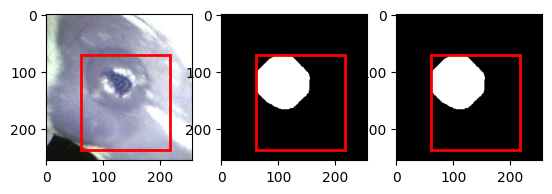

In [16]:
idx = random.randint(0, len(train_images))

fig, ax = plt.subplots(1,3)

bbox_old = get_bounding_box(train_masks[idx])
bbox_new = get_bounding_box_new(train_masks[idx]) 

rect_image = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect_image)

rect_old = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
ax[1].add_patch(rect_old)

rect_new = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
ax[2].add_patch(rect_new)

ax[0].imshow(train_images[idx])
ax[1].imshow(train_masks[idx], cmap="gray")
ax[2].imshow(train_masks[idx], cmap="gray")